# Introdução
___
Este arquivo tem por objetivo realizar o tratamento de dados do arquivo `cs_bisnode_panel.csv`.

### Introdução ao Projeto Final referente ao 1º trimestre do Programa Avançado em Data Science e Decisão :
Este trabalho tem como objetivo construir um pipeline completo de pré-processamento de dados e desenvolver um modelo preditivo de classificação. O foco principal é prever se uma empresa irá encerrar suas operações nos próximos dois anos.

Os dados utilizados foram fornecidos pela Bisnode, uma empresa europeia especializada em business information. A base de dados abrange o período de 2005 a 2016 e inclui empresas de diversos setores da economia.

Durante o processo, foram realizadas diversas etapas de exploração e tratamento de inconsistências nos dados. Além disso, as empresas com receita inferior a 1000 e acima de 100 milhões de euros foram removidas para minimizar o risco de identificação e assegurar a integridade do estudo.

Ao final, a base de dados foi preparada e ajustada para a construção de um modelo preditivo de classificação, utilizando a linguagem R, com o intuito de identificar padrões que possam indicar a probabilidade de uma empresa deixar de operar em até dois anos.


# 1. Importação dos dados e tratamento
___

## Importando bibliotecas e lendo arquivo csv

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import pywedge

In [34]:
#pip install --upgrade missingno

In [35]:
#pip install matplotlib==3.1.3


In [36]:
import missingno as msno

In [37]:
df = pd.read_csv("cs_bisnode_panel.csv")
df.head()

,comp_id,begin,end,COGS,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,...,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg
0,1001034.0,2005-01-01,2005-12-31,NaN,692.592590,7266.666504,7574.074219,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
1,1001034.0,2006-01-01,2006-12-31,NaN,603.703674,13122.222656,12211.111328,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
2,1001034.0,2007-01-01,2007-12-31,NaN,425.925934,8196.295898,7800.000000,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
3,1001034.0,2008-01-01,2008-12-31,NaN,300.000000,8485.185547,7781.481445,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
4,1001034.0,2009-01-01,2009-12-31,NaN,207.407410,5137.037109,15300.000000,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,0.083333


## Verificando dados faltantes com missingno

<Axes: >

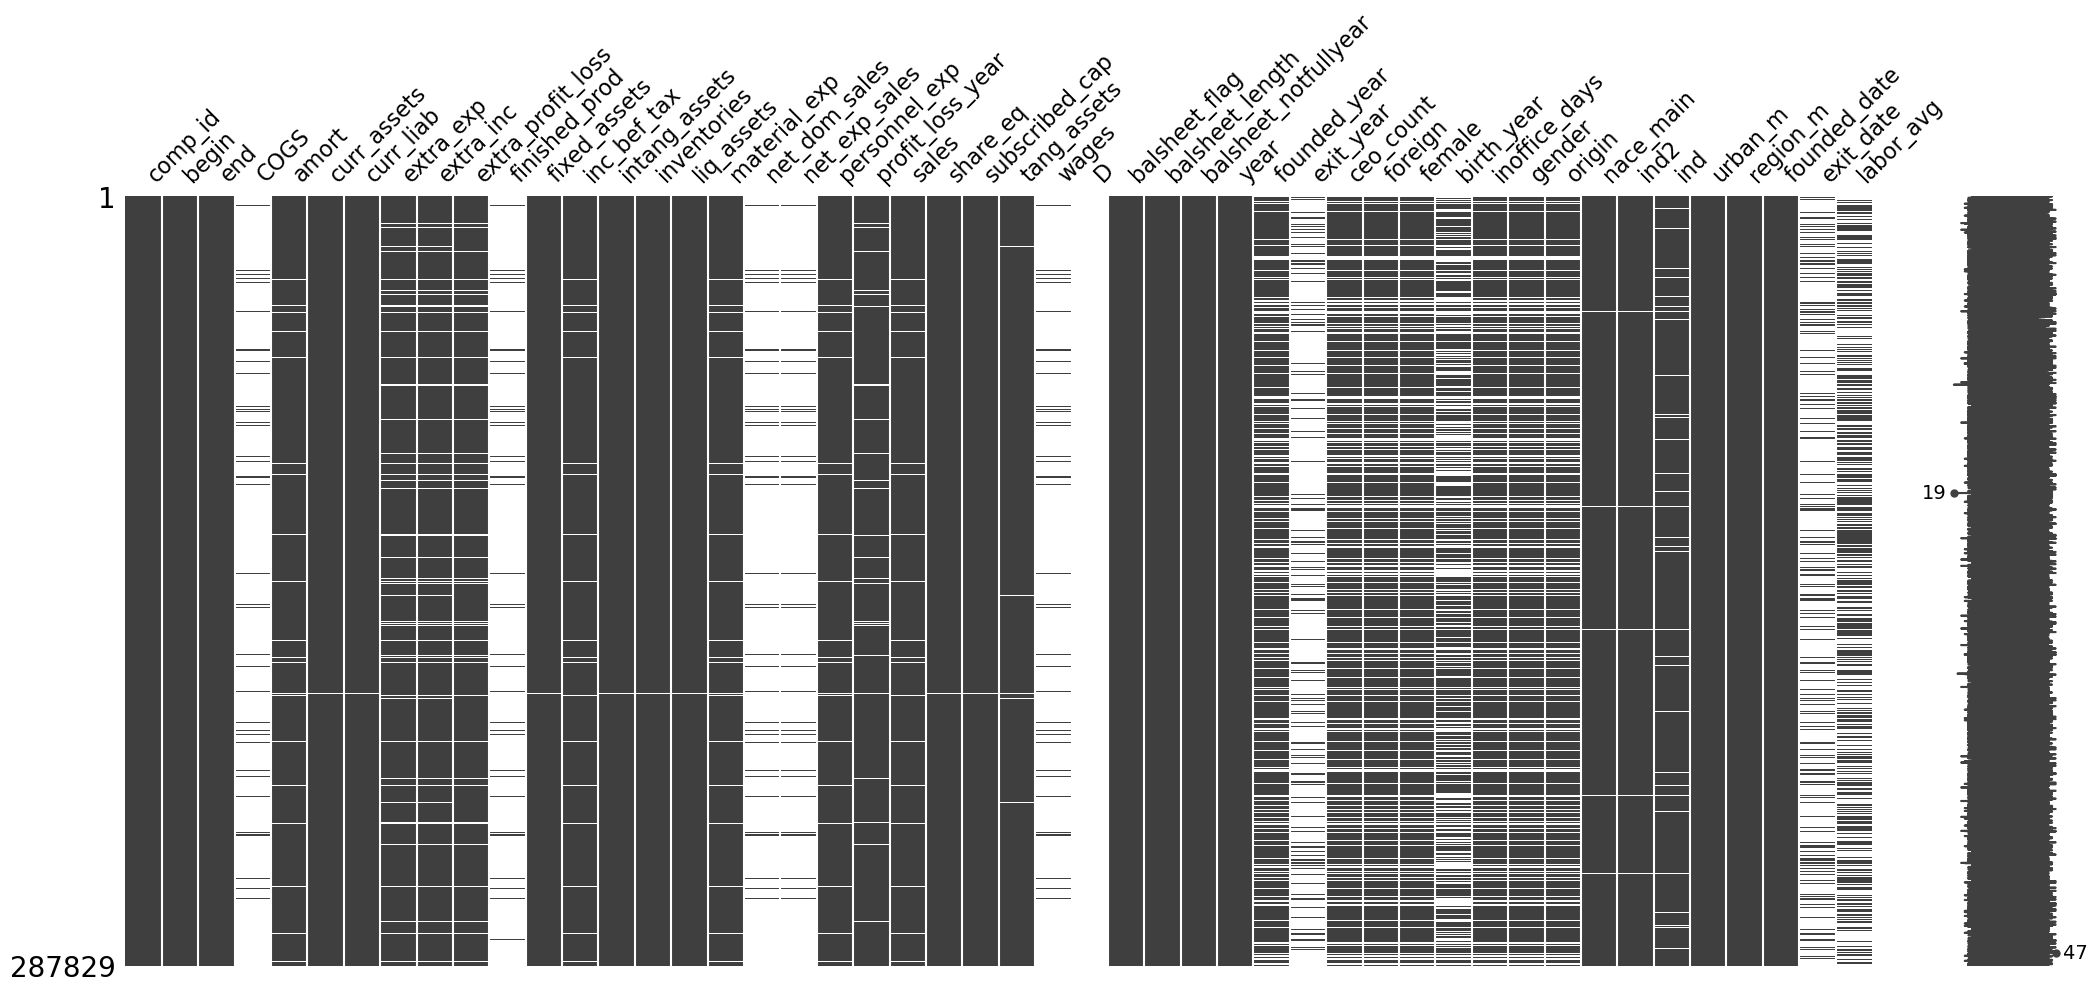

In [38]:
msno.matrix(df)

## Transformando as colunas de data para o foramto `dateTime`

In [39]:
df["begin"] = pd.to_datetime(df['begin'])
df["end"] = pd.to_datetime(df['end'])
df["year"] = pd.to_datetime(df['year'])

## Checando valores faltantes na base de dados

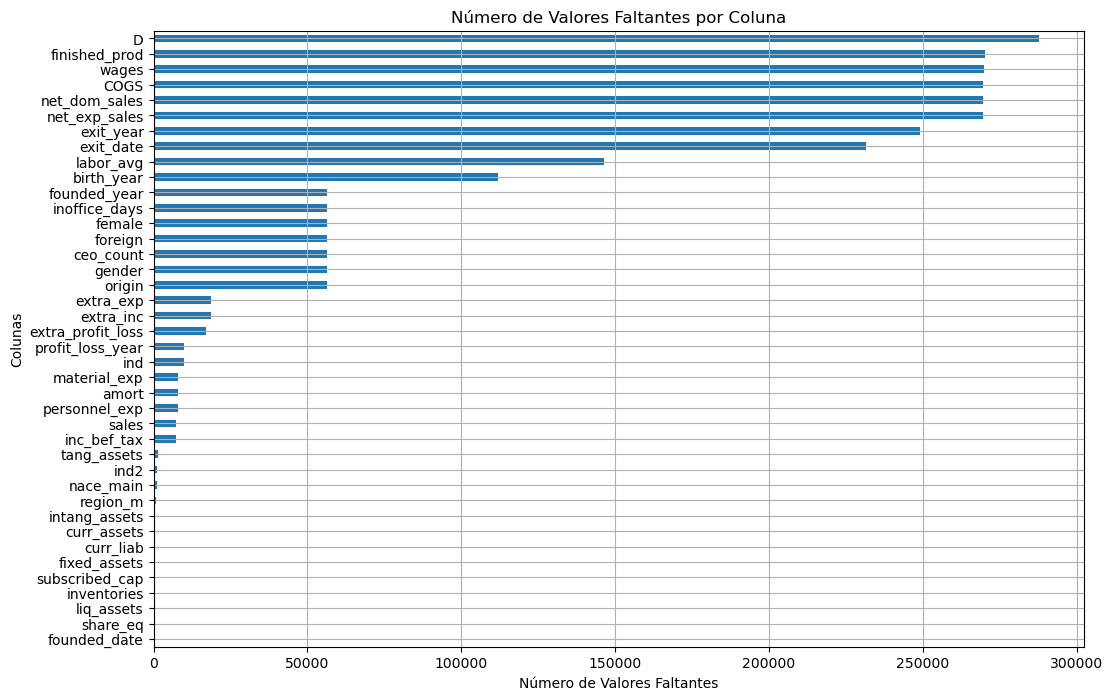

In [40]:
# Calcular o número de valores faltantes por coluna
missing_values = df.isnull().sum()

# Filtrar colunas com valores faltantes
missing_values = missing_values[missing_values > 0]

# Ordenar os valores em ordem decrescente
missing_values.sort_values(inplace=True)

# Criar um gráfico de barras horizontal
plt.figure(figsize=(12, 8))
missing_values.plot.barh()
plt.title('Número de Valores Faltantes por Coluna')
plt.xlabel('Número de Valores Faltantes')
plt.ylabel('Colunas')
plt.grid(True)
plt.show()

## Checando os valores faltantes absolutos de acordo com o ano

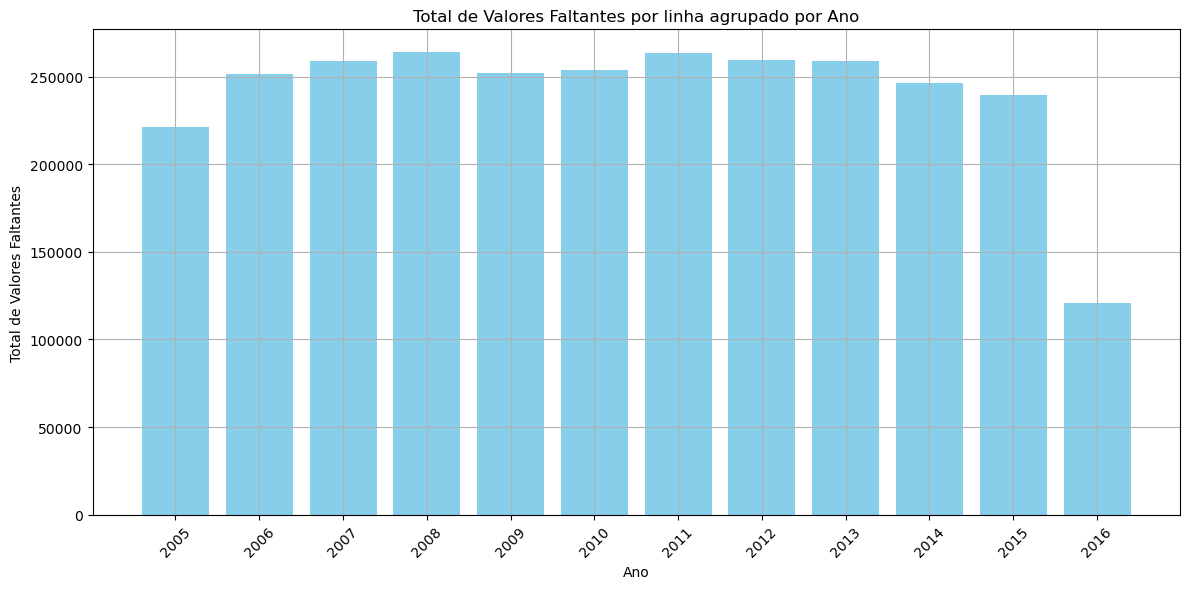

In [41]:
# Converter a coluna 'year' para tipo numérico (caso não esteja)
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Remover linhas onde 'year' é nulo
df = df[df['year'].notnull()]

# Calcular o número de valores faltantes por linha
df['missing_count'] = df.isnull().sum(axis=1)

# Agrupar por 'year' e somar o número de valores faltantes
missing_per_year = df.groupby('year')['missing_count'].sum().reset_index()

# Converter 'year' para inteiro
missing_per_year['year'] = missing_per_year['year'].astype(int)

# Ordenar os dados pelo ano
missing_per_year = missing_per_year.sort_values('year')

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(missing_per_year['year'], missing_per_year['missing_count'], color='skyblue')
plt.title('Total de Valores Faltantes por linha agrupado por Ano')
plt.xlabel('Ano')
plt.ylabel('Total de Valores Faltantes')
plt.xticks(missing_per_year['year'], rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

## Checando a procentagem de valores faltantes de acordo com o ano

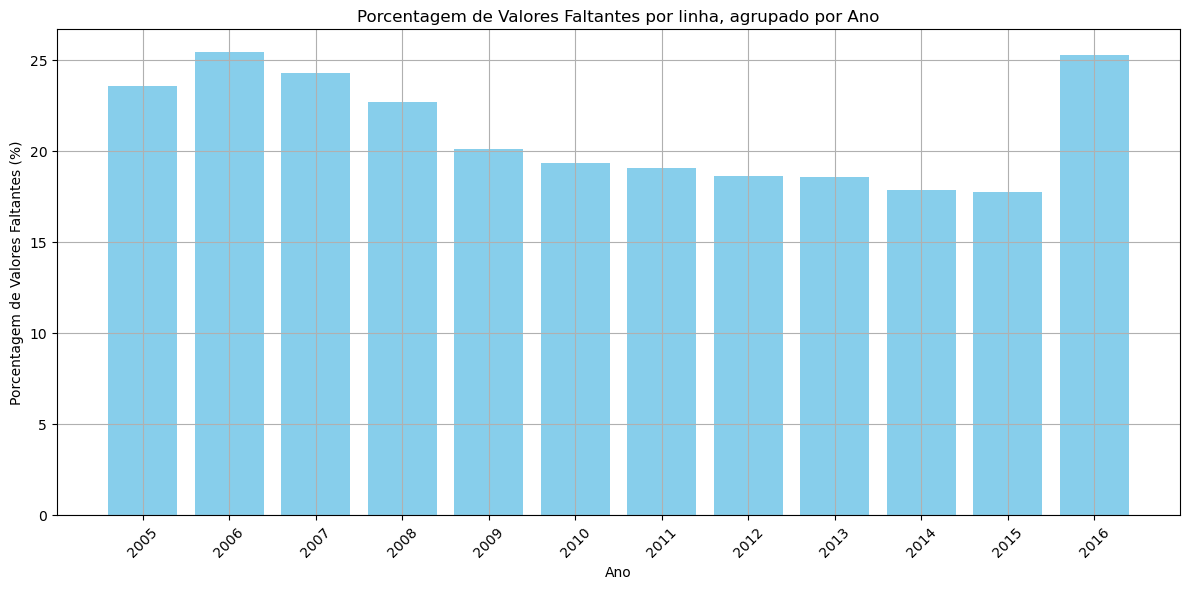

In [42]:
# Converter a coluna 'year' para tipo numérico (caso não esteja)
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Remover linhas onde 'year' é nulo
df = df[df['year'].notnull()]

# Calcular o número total de colunas (para usar no cálculo da porcentagem)
total_columns = df.shape[1]

# Calcular o número de valores faltantes por linha
df['missing_count'] = df.isnull().sum(axis=1)

# Agrupar por 'year' e calcular a média dos valores faltantes em relação ao total de colunas
missing_per_year = df.groupby('year')['missing_count'].sum().reset_index()

# Calcular o número de entradas por ano
entries_per_year = df.groupby('year').size().reset_index(name='total_entries')

# Juntar o número de entradas por ano ao DataFrame de valores faltantes
missing_per_year = missing_per_year.merge(entries_per_year, on='year')

# Calcular a porcentagem de valores faltantes por ano
missing_per_year['missing_percentage'] = (missing_per_year['missing_count'] / (missing_per_year['total_entries'] * total_columns)) * 100

# Converter 'year' para inteiro
missing_per_year['year'] = missing_per_year['year'].astype(int)

# Ordenar os dados pelo ano
missing_per_year = missing_per_year.sort_values('year')

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(missing_per_year['year'], missing_per_year['missing_percentage'], color='skyblue')
plt.title('Porcentagem de Valores Faltantes por linha, agrupado por Ano')
plt.xlabel('Ano')
plt.ylabel('Porcentagem de Valores Faltantes (%)')
plt.xticks(missing_per_year['year'], rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

Retirando a coluna utilizada para plotar os graficos para que ela nao atrapalhe no treinamento dos modelos

In [43]:
df = df.drop(columns="missing_count")

# 2. Removendo dados do ano de 2016
___

In [44]:
# retinrando os dados em que o ano seja 2016 ou maior
df = df[df["year"] < 2016]
df.head()

,comp_id,begin,end,COGS,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,...,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg
0,1001034.0,2005-01-01,2005-12-31,NaN,692.592590,7266.666504,7574.074219,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
1,1001034.0,2006-01-01,2006-12-31,NaN,603.703674,13122.222656,12211.111328,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
2,1001034.0,2007-01-01,2007-12-31,NaN,425.925934,8196.295898,7800.000000,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
3,1001034.0,2008-01-01,2008-12-31,NaN,300.000000,8485.185547,7781.481445,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
4,1001034.0,2009-01-01,2009-12-31,NaN,207.407410,5137.037109,15300.000000,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,0.083333


# 3. Criando a coluna indicadora de operação da empresa 
(se a empresa está operante em x+2 anos ou Não)
___

## Criando a variável resposta

In [45]:
# Ordenando o DataFrame original por 'comp_id' e 'begin' para garantir a ordem cronológica
df_sorted = df.sort_values(by=['comp_id', 'begin'])

# Criando a variável resposta 'operates_within_2_years' no DataFrame ordenado
df_sorted['operates_within_2_years'] = df_sorted.groupby('comp_id')['sales'].shift(-2).gt(0).astype(int)

# Adicionando a nova coluna 'operates_within_2_years' de df_sorted ao df original
df['operates_within_2_years'] = df_sorted['operates_within_2_years']

In [46]:
# Verificando as primeiras linhas do df para garantir que a coluna foi adicionada corretamente
df[["comp_id", "sales", "operates_within_2_years"]].head(30)

,comp_id,sales,operates_within_2_years
0,1001034.0,6.275185e+04,1
1,1001034.0,6.462593e+04,1
2,1001034.0,6.510000e+04,1
3,1001034.0,7.808519e+04,1
4,1001034.0,4.538889e+04,0
5,1001034.0,9.929630e+03,0
6,1001034.0,0.000000e+00,0
7,1001034.0,0.000000e+00,0
8,1001034.0,0.000000e+00,0
9,1001034.0,0.000000e+00,0


* `groupby('comp_id')`: Agrupa os dados por empresa usando comp_id para que o cálculo de sales dois anos à frente seja feito separadamente para cada empresa.
* `.shift(-2)`: Pega o valor de sales duas linhas à frente dentro de cada grupo, o que equivale a dois anos à frente, devido à ordenação das datas.
* `apply(lambda x: 1 if x > 0 else 0)`: Define 1 se o valor for positivo e 0 caso contrário.

## Plotando um gráfico comparando as empresas que faliram e as que continuaram operando:

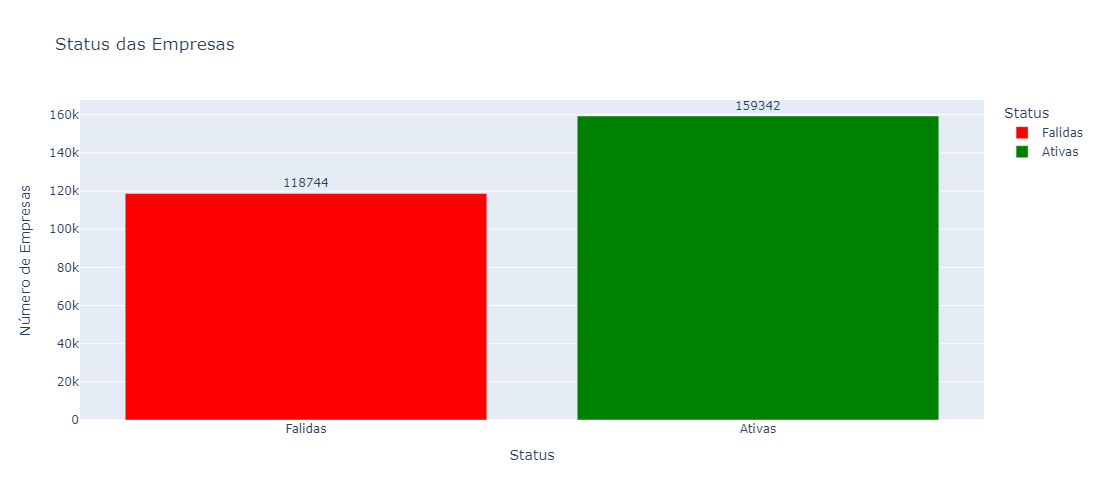

In [47]:
import plotly.express as px
# Contar o número de empresas ativas e falidas
status_counts = df['operates_within_2_years'].value_counts().sort_index()

# Criando um DataFrame para facilitar o plot
status_data = pd.DataFrame({
    'Status': ['Falidas', 'Ativas'],
    'Quantidade': [status_counts.get(0, 0), status_counts.get(1, 0)]  # Se não houver 0 ou 1, retorna 0
})
fig = px.bar(
    status_data, 
    x='Status', 
    y='Quantidade', 
    color='Status',
    color_discrete_map={'Falidas': 'red', 'Ativas': 'green'},
    title='Status das Empresas', 
    text='Quantidade',
    width=800,  
    height=500  
)

fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(yaxis_title='Número de Empresas', xaxis_title='Status')
fig.show()


# 4. Filtro para trabalhar apenas com empresas do ano de 2012
___

In [48]:
df = df[df['year'] == 2012]

In [49]:
df.head()

,comp_id,begin,end,COGS,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,...,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg,operates_within_2_years
7,1001034.0,2012-01-01,2012-12-31,NaN,140.740738,148.148148,21429.628906,0.0,0.0,0.0,...,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,0.083333,0
14,1001541.0,2012-01-01,2012-12-31,NaN,481.481476,9629.629883,1303.703735,0.0,0.0,0.0,...,Domestic,5610.0,56.0,3.0,3,Central,2008-02-24,NaN,NaN,1
23,1002029.0,2012-01-01,2012-12-31,NaN,14929.629883,203885.187500,120444.453125,0.0,0.0,0.0,...,Domestic,2711.0,27.0,2.0,3,East,2006-07-03,NaN,0.458333,1
35,1003200.0,2012-01-01,2012-12-31,NaN,25.925926,22.222221,10996.295898,0.0,0.0,0.0,...,Domestic,5630.0,56.0,3.0,1,Central,2003-10-21,2014-08-09,NaN,0
48,1007261.0,2012-01-01,2012-12-31,NaN,0.000000,255.555557,9207.407227,0.0,0.0,0.0,...,Domestic,5610.0,56.0,3.0,1,Central,2010-08-26,2015-11-19,0.083333,0


# 5. Criando preditoras auxiliares com base nas colunas com dados administrativos das empresas:
___

In [50]:
import numpy as np

# Verificar se as colunas necessárias estão presentes no DataFrame
required_columns = ['liq_assets', 'curr_liab', 'profit_loss_year', 'sales', 'share_eq']
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    print(f"As seguintes colunas estão faltando no DataFrame: {missing_columns}")
else:
    # Criando as colunas derivadas e lidando com NaN ou infinito
    # Razão de Liquidez: Se houver divisão por zero ou NaN, o resultado será substituído por 0
    df.loc[:, 'liquidity_ratio'] = np.where(
        df['curr_liab'] == 0, 0, df['liq_assets'] / df['curr_liab']
    )
    df['liquidity_ratio'].replace([np.inf, -np.inf, np.nan], 0, inplace=True)

    # Margem de Lucro: Lidando com valores faltantes ou divisões por zero
    df.loc[:, 'profit_margin'] = np.where(
        df['sales'] == 0, 0, df['profit_loss_year'] / df['sales']
    )
    df['profit_margin'].replace([np.inf, -np.inf, np.nan], 0, inplace=True)

    # Alavancagem: Substituindo divisões por zero ou NaN por 0
    df.loc[:, 'leverage_ratio'] = np.where(
        df['share_eq'] == 0, 0, df['curr_liab'] / df['share_eq']
    )
    df['leverage_ratio'].replace([np.inf, -np.inf, np.nan], 0, inplace=True)

    # Removendo as colunas originais após a criação das variáveis derivadas
    df = df.drop(columns=['liq_assets', 'curr_liab', 'profit_loss_year', 'share_eq'])

    # Verificando as primeiras linhas para garantir o resultado
    print(df.head())


      comp_id      begin        end  COGS         amort    curr_assets  \
7   1001034.0 2012-01-01 2012-12-31   NaN    140.740738     148.148148   
14  1001541.0 2012-01-01 2012-12-31   NaN    481.481476    9629.629883   
23  1002029.0 2012-01-01 2012-12-31   NaN  14929.629883  203885.187500   
35  1003200.0 2012-01-01 2012-12-31   NaN     25.925926      22.222221   
48  1007261.0 2012-01-01 2012-12-31   NaN      0.000000     255.555557   

    extra_exp  extra_inc  extra_profit_loss  finished_prod  ...  ind  urban_m  \
7         0.0        0.0                0.0            NaN  ...  3.0        1   
14        0.0        0.0                0.0            NaN  ...  3.0        3   
23        0.0        0.0                0.0            NaN  ...  2.0        3   
35        0.0        0.0                0.0            NaN  ...  3.0        1   
48        0.0        0.0                0.0            NaN  ...  3.0        1   

    region_m  founded_date   exit_date  labor_avg  operates_within_2

/tmp/ipykernel_68155/1645940739.py:15: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipykernel_68155/1645940739.py:21: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)

# 6. Retirando as colunas `'COGS', 'finished_prod', 'net_dom_sales','net_exp_sales', 'wages', 'D'` e checando missing em outras colunas
___

## Retirando todas as colunas com alta taxa de missing, de acorda com um limite pré-definido:

In [51]:
#Checando as colunas e seus respectivos valores de missing
percent_missing = df.isnull().mean() * 100
missing_columns = percent_missing[percent_missing > 0].sort_values(ascending=False)
print(missing_columns)

D                    100.000000
finished_prod         94.854052
wages                 94.766237
net_exp_sales         94.685447
net_dom_sales         94.685447
COGS                  94.685447
exit_year             88.039622
exit_date             86.030419
birth_year            26.909972
labor_avg             24.834030
founded_year          11.201658
foreign               11.194633
ceo_count             11.194633
origin                11.194633
gender                11.194633
inoffice_days         11.194633
female                11.194633
personnel_exp          3.835751
amort                  3.835751
material_exp           3.835751
inc_bef_tax            3.593382
extra_profit_loss      3.593382
sales                  3.593382
extra_exp              3.593382
extra_inc              3.593382
ind                    2.999754
region_m               0.273982
fixed_assets           0.070252
curr_assets            0.070252
tang_assets            0.070252
intang_assets          0.070252
subscrib

## Retirando as colunas com valor de missing acima do limite exceto a coluna `founded_year` que será necessária adiante

### obs: como as colunas 'COGS', 'finished_prod', 'net_dom_sales','net_exp_sales', 'wages', 'D' estão nesse filtro, acabarão sendo excluídas conforme orientado

In [52]:
limite = 0.1  # limite da taxa de missing

# Excluindo as colunas acima do limite de missing, exceto 'founded_year'
colunas_para_manter = df.columns[df.isnull().mean() <= limite].tolist()

# Garantindo que a coluna 'founded_year' esteja na lista, mesmo que tenha mais de 10% de missing
if 'founded_year' not in colunas_para_manter:
    colunas_para_manter.append('founded_year')

# Criando o DataFrame filtrado
df = df[colunas_para_manter]

# Verificando o DataFrame resultante
print(df)


             comp_id      begin        end         amort   curr_assets  \
7       1.001034e+06 2012-01-01 2012-12-31    140.740738  1.481481e+02   
14      1.001541e+06 2012-01-01 2012-12-31    481.481476  9.629630e+03   
23      1.002029e+06 2012-01-01 2012-12-31  14929.629883  2.038852e+05   
35      1.003200e+06 2012-01-01 2012-12-31     25.925926  2.222222e+01   
48      1.007261e+06 2012-01-01 2012-12-31      0.000000  2.555556e+02   
...              ...        ...        ...           ...           ...   
287779  4.639820e+11 2012-01-01 2012-12-31  16337.037109  3.140000e+04   
287790  4.640212e+11 2012-01-01 2012-12-31   3566.666748  3.149630e+04   
287798  4.640446e+11 2012-01-01 2012-12-31  76059.257812  4.776548e+06   
287814  4.641050e+11 2012-01-01 2012-12-31   1311.111084  3.261481e+04   
287825  4.641209e+11 2012-01-01 2012-12-31      0.000000  1.518519e+03   

        extra_exp  extra_inc  extra_profit_loss   fixed_assets    inc_bef_tax  \
7        0.000000        0.0  

# 7. Preenchendo valores faltantes nas colunas de acordo com seu tipo:
___

In [53]:
# Substituir valores Inf por NaN, para que sejam removidos ou preenchidos corretamente
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Estratégia 1: Para colunas numéricas, preencher com a mediana
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Estratégia 2: Para colunas categóricas, preencher com a moda (valor mais frequente)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Verificando o DataFrame resultante
print(df.isnull().sum())  # Deve retornar 0 missing values se o preenchimento foi bem sucedido


comp_id                    0
begin                      0
end                        0
amort                      0
curr_assets                0
extra_exp                  0
extra_inc                  0
extra_profit_loss          0
fixed_assets               0
inc_bef_tax                0
intang_assets              0
inventories                0
material_exp               0
personnel_exp              0
sales                      0
subscribed_cap             0
tang_assets                0
balsheet_flag              0
balsheet_length            0
balsheet_notfullyear       0
year                       0
nace_main                  0
ind2                       0
ind                        0
urban_m                    0
region_m                   0
founded_date               0
operates_within_2_years    0
liquidity_ratio            0
profit_margin              0
leverage_ratio             0
founded_year               0
dtype: int64


## Como a base de dados possuí um número alto de colunas, fizemos um filtro mais rigoroso para missing, uma vez que isso não afetará o numero de variavéis para treinamento do modelo de forma muito significativa, e nos garantirá um modelo melhor por ser treinado em um banco de dados com baixa taxa de missing.

In [54]:
# Checando a taxa de missing nas colunas após filtragem
percent_missing = df.isnull().mean() * 100
missing_columns = percent_missing[percent_missing > 0].sort_values(ascending=False)
print(missing_columns)

Series([], dtype: float64)


In [55]:
# checando as colunas presentas no dataframe para ver quantas variaveis teremos para trabalhar em nosso modelo
df.shape[1]

32

# 8. Trabalhando as incosistencias
___

## Ajustando a coluna sales

### Filtrando os dados para empresas com revenue abaixo de 10 milhões
Como não há uma coluna `revenue`, iremos considerar que `sales` corresponde à receita da empresa

In [56]:
df['sales'].describe()

count    2.846900e+04
mean     4.216520e+05
std      3.468619e+06
min     -1.834445e+04
25%      3.766667e+03
50%      2.515556e+04
75%      9.184815e+04
max      1.058662e+08
Name: sales, dtype: float64

### Checando a assimetria da coluna `Sales`

In [57]:
df["sales"].skew()

18.021435612229606

## Tratando valores negativos e analisando a mudança após a transformação logarítmica

Skewness antes da transformação: 18.021436597791894
Skewness depois da transformação: -1.1401093333323502


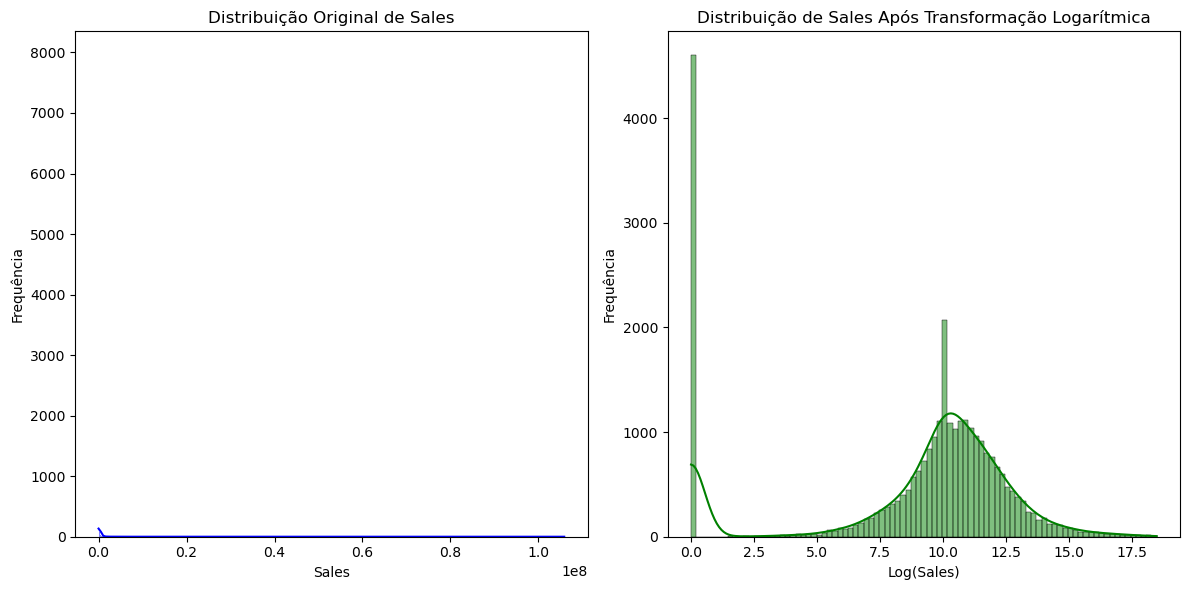

In [58]:
# Tratando valores negativos em 'sales' antes de qualquer operação
df['sales'] = np.where(df['sales'] < 0, 0, df['sales'])  # Substituindo negativos por zero

# Calculando a assimetria antes da transformação
print("Skewness antes da transformação:", df["sales"].skew())

# Configurando o grid de subplots
plt.figure(figsize=(12, 6))

# Primeiro subplot: Distribuição original
plt.subplot(1, 2, 1)
sns.histplot(df['sales'], kde=True, color='blue')
plt.title('Distribuição Original de Sales')
plt.xlabel('Sales')
plt.ylabel('Frequência')

# Aplicando a transformação logarítmica
df['log_sales'] = np.log1p(df['sales'])

# Calculando a assimetria após a transformação
print("Skewness depois da transformação:", df["log_sales"].skew())

# Segundo subplot: Distribuição transformada
plt.subplot(1, 2, 2)
sns.histplot(df['log_sales'], kde=True, color='green')
plt.title('Distribuição de Sales Após Transformação Logarítmica')
plt.xlabel('Log(Sales)')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()


Atribuindo a escala logarítima de `sales` para a coluna

In [59]:
df["sales"] = df["log_sales"]
df = df.drop(columns = "log_sales")

# 9. Realizando o corte de `revenue`
____

## Como a coluna `revenue` não existe em nossa base de dados, utilizaremos `inc_bef_tax` pois consegue refletir a receita bruta de uma empresa independete das politicas de tributação locais, assim sendo mais confiável do que `sales`

In [60]:
df = df[(df['inc_bef_tax'] > 1000) & (df['inc_bef_tax'] < 10_000_000)] # filtrando os dados

## Checando a assimetria de outras colunas do dataset

In [61]:
# Verificando a assimetria (skewness) de todas as colunas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns
skewed_cols = df[numeric_cols].skew().sort_values(ascending=False)

# Exibir as colunas com alta assimetria positiva (por exemplo, acima de 1)
print("Colunas com alta assimetria:")
print(skewed_cols[skewed_cols > 1])

# Criando uma lista para armazenar colunas que devem ser removidas
#colunas_para_remover = []

# Aplicando a transformação logarítmica apenas às colunas com alta assimetria e sem valores negativos
for col in skewed_cols[skewed_cols > 1].index:
    if (df[col] >= 0).all():  # Verificar se todos os valores são >= 0
        df[col] = np.log1p(df[col])  # Usando log1p para evitar problemas com valores zero ou negativos
    else:
        print(f"Coluna '{col}' contém valores negativos e não será alterada")
        #colunas_para_remover.append(col)

# Verificando a nova assimetria após a transformação
new_skewed_cols = df[numeric_cols].skew().sort_values(ascending=False)
print("Assimetria após transformação logarítmica:")
print(new_skewed_cols)

# Remover colunas que possuem alta assimetria após a transformação
#for col in new_skewed_cols[new_skewed_cols > 1].index:
    #print(f"Coluna '{col}' ainda possui alta assimetria e será removida.")
    #colunas_para_remover.append(col)

# Remover as colunas do DataFrame
#df = df.drop(columns=colunas_para_remover)

# Exibir as colunas restantes
print("Colunas restantes no DataFrame:")
print(df.columns)

Colunas com alta assimetria:
profit_margin           89.921137
liquidity_ratio         66.186082
extra_exp               45.401744
extra_inc               35.276712
intang_assets           33.354955
leverage_ratio          31.169030
fixed_assets            28.253707
subscribed_cap          28.037319
tang_assets             21.520976
extra_profit_loss       20.538346
personnel_exp           19.362466
inventories             16.084110
curr_assets             15.059229
amort                   13.827359
inc_bef_tax             13.104659
material_exp            12.646463
balsheet_flag           11.297746
balsheet_notfullyear     4.667426
dtype: float64
Coluna 'profit_margin' contém valores negativos e não será alterada
Coluna 'liquidity_ratio' contém valores negativos e não será alterada
Coluna 'extra_inc' contém valores negativos e não será alterada
Coluna 'intang_assets' contém valores negativos e não será alterada
Coluna 'leverage_ratio' contém valores negativos e não será alterada
Colun

## Criando a coluna `Idade_da_empresa`

In [62]:
df['Idade_da_empresa'] = np.where(
    (df['year'].isna()) | (df['founded_year'].isna()),  # Condição: se 'year' ou 'founded_year' forem NaN
    np.nan,  # Se a condição for verdadeira (há missing values), preenche com NaN
    df['year'] - df['founded_year']  # Caso contrário, realiza a subtração normalmente
)
df['Idade_da_empresa'].head()

23      6.0
56     20.0
113    14.0
135     2.0
170     4.0
Name: Idade_da_empresa, dtype: float64

## Codificando as colunas não numéricas para serem utilizadas nos modelos: 

In [63]:
# Codificar 'region_m' (aqui estou usando Label Encoding)
# Se houver poucas categorias, podemos usar Label Encoding
df['region_m_encoded'] = df['region_m'].astype('category').cat.codes

# Alternativamente, para One-Hot Encoding:
# df = pd.get_dummies(df, columns=['region_m'], drop_first=True)

# Codificar 'founded_date' extraindo o ano
df['founded_year'] = pd.to_datetime(df['founded_date']).dt.year

# Agora, removemos as colunas originais que foram codificadas
df = df.drop(columns=['begin', 'end', 'region_m', 'founded_date'])

In [64]:
#colunas = ["balsheet_length", "year","comp_id","ind","ind2","urban_m"]
dadosR = df.drop(columns="comp_id")
dadosR.head()

,amort,curr_assets,extra_exp,extra_inc,extra_profit_loss,fixed_assets,inc_bef_tax,intang_assets,inventories,material_exp,...,ind2,ind,urban_m,operates_within_2_years,liquidity_ratio,profit_margin,leverage_ratio,founded_year,Idade_da_empresa,region_m_encoded
23,14929.629883,2.038852e+05,0.000000,0.0,0.000000,10.063063,9.377508,0.000000,6.520294,13.799657,...,27.0,2.0,3,1,0.125184,0.008554,1.293093,2006,6.0,1
56,36625.925781,1.601667e+05,0.000000,0.0,0.000000,13.746777,11.479915,1537.036987,9.381573,12.229107,...,55.0,3.0,2,1,6.967685,0.223102,0.017657,1992,20.0,2
113,66944.445312,2.406474e+06,9.897408,0.0,-19877.777344,14.176658,11.730968,0.000000,14.439366,15.022378,...,29.0,1.0,3,1,0.002986,0.020413,0.493680,1998,14.0,0
135,0.000000,8.500000e+03,0.000000,0.0,0.000000,0.000000,7.653688,0.000000,0.000000,6.843789,...,56.0,3.0,1,1,6.750000,0.371134,0.152262,2010,2.0,0
170,111.111107,1.631481e+04,0.000000,0.0,0.000000,6.147756,7.037060,0.000000,0.000000,9.307087,...,27.0,2.0,2,1,10.016172,0.029699,0.090554,2008,4.0,0


# 10. Criando o dataset para treinar o modelo
___

## Checando colunas com números nulos:

In [65]:
# Verificando o total de valores NaN e imprimindo apenas colunas com NaN
print("Colunas com valores NaN no dataset:")
nan_cols = dadosR.isnull().sum()
print(nan_cols[nan_cols > 0])

# Verificando se há valores Inf no dataset e imprimindo apenas colunas com Inf
print("Colunas com valores Inf no dataset:")
inf_cols = (dadosR == np.inf).sum() + (dadosR == -np.inf).sum()
print(inf_cols[inf_cols > 0])


Colunas com valores NaN no dataset:
Series([], dtype: int64)
Colunas com valores Inf no dataset:
Series([], dtype: int64)


<Axes: >

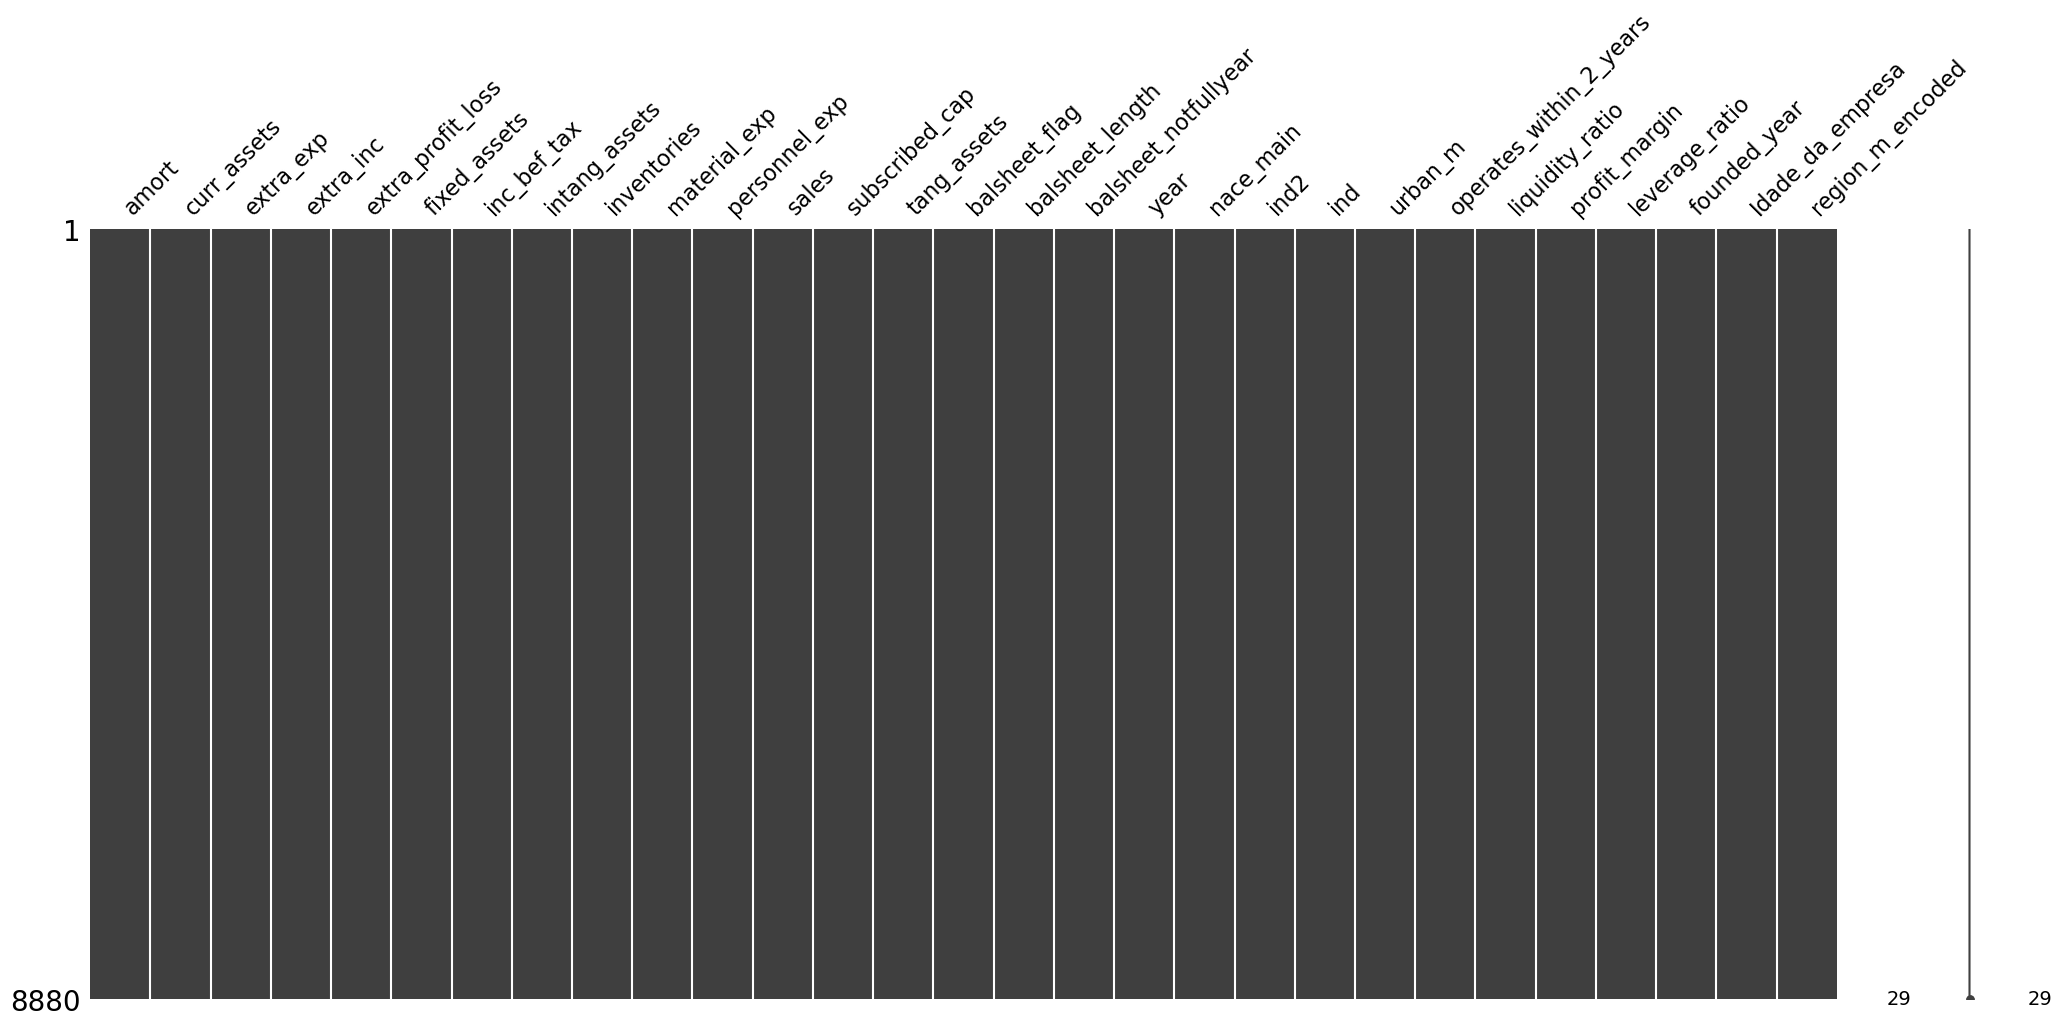

In [68]:
msno.matrix(dadosR)

## Criando arquivo com os dados processados para serem utilizados no R

In [66]:
dadosR.to_csv("dados_para_o_R.csv", index = True)

## Checando o formato dos dados

In [67]:
print(f"O dataset final tem {dadosR.shape[0]} linhas e {dadosR.shape[1]} colunas")

O dataset final tem 8880 linhas e 29 colunas
